# 下载数据

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

!cp /content/drive/MyDrive/dataset/mitbih.zip ./

In [ ]:
!unzip /content/mitbih.zip

Archive:  /content/mitbih.zip
  inflating: mitbih_test.csv         
  inflating: mitbih_train.csv        


In [ ]:
# !python /content/project/main.py

# 导入python包

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn import metrics
import pandas as pd
import seaborn as sns
import pydotplus
from sklearn import tree

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from torch import nn
from torch.utils.data import Dataset,DataLoader,TensorDataset

import torch
from torch.utils.data import Dataset
from torchvision import datasets,models
from torchvision.transforms import ToTensor
from torchvision import datasets, models, transforms
from torch.utils.data import DataLoader
from torch import nn
import torch.nn.functional as F

# 制作数据集

## 导入数据集

In [ ]:
df_train = pd.read_csv('/content/mitbih_train.csv',header=None).sample(frac=1).reset_index(drop=True)
df_test = pd.read_csv('/content/mitbih_test.csv',header=None).sample(frac=1).reset_index(drop=True)
df_train.rename(columns={187: 'class'}, inplace=True)
df_test.rename(columns={187: 'class'}, inplace=True)
df_train

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,class
0,1.000000,0.896000,0.456000,0.000000,0.024000,0.284000,0.394000,0.380000,0.372000,0.388000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.959839,0.670683,0.020080,0.068273,0.052209,0.094378,0.130522,0.134538,0.130522,0.146586,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.803371,0.634831,0.418539,0.323034,0.191011,0.120787,0.070225,0.064607,0.042135,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.823045,0.213992,0.024691,0.187243,0.139918,0.084362,0.092593,0.086420,0.082305,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.000000,0.929095,0.669927,0.537897,0.544010,0.536675,0.508557,0.488998,0.463325,0.447433,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87549,1.000000,0.839917,0.241164,0.000000,0.139293,0.120582,0.060291,0.064449,0.058212,0.045738,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
87550,1.000000,0.887029,0.548117,0.163180,0.029289,0.163180,0.251046,0.280335,0.326360,0.343096,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
87551,0.000000,0.263736,0.554945,0.137363,0.071429,0.296703,0.423077,0.445055,0.472527,0.456044,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
87552,1.000000,0.938202,0.713483,0.455056,0.224719,0.157303,0.179775,0.162921,0.140449,0.168539,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
type(df_train.iloc[:, -1][0])

numpy.float64

## label映射

In [ ]:
id_to_label = {
    0: "Normal",
    1: "Artial Premature",
    2: "Premature ventricular contraction",
    3: "Fusion of ventricular and normal",
    4: "Fusion of paced and normal"
}
df_train['label'] = df_train.iloc[:, -1].astype('int').map(id_to_label)
df_test['label'] = df_test.iloc[:, -1].astype('int').map(id_to_label)
df_train

,0,1,2,3,4,5,6,7,8,9,...,179,180,181,182,183,184,185,186,class,label
0,1.000000,0.896000,0.456000,0.000000,0.024000,0.284000,0.394000,0.380000,0.372000,0.388000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal
1,0.959839,0.670683,0.020080,0.068273,0.052209,0.094378,0.130522,0.134538,0.130522,0.146586,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal
2,1.000000,0.803371,0.634831,0.418539,0.323034,0.191011,0.120787,0.070225,0.064607,0.042135,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal
3,1.000000,0.823045,0.213992,0.024691,0.187243,0.139918,0.084362,0.092593,0.086420,0.082305,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal
4,1.000000,0.929095,0.669927,0.537897,0.544010,0.536675,0.508557,0.488998,0.463325,0.447433,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87549,1.000000,0.839917,0.241164,0.000000,0.139293,0.120582,0.060291,0.064449,0.058212,0.045738,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal
87550,1.000000,0.887029,0.548117,0.163180,0.029289,0.163180,0.251046,0.280335,0.326360,0.343096,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal
87551,0.000000,0.263736,0.554945,0.137363,0.071429,0.296703,0.423077,0.445055,0.472527,0.456044,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal
87552,1.000000,0.938202,0.713483,0.455056,0.224719,0.157303,0.179775,0.162921,0.140449,0.168539,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal


## 数据可视化探索

In [ ]:
df_train['label'].value_counts()

label
Normal                               72471
Fusion of paced and normal            6431
Premature ventricular contraction     5788
Artial Premature                      2223
Fusion of ventricular and normal       641
Name: count, dtype: int64

<Axes: >

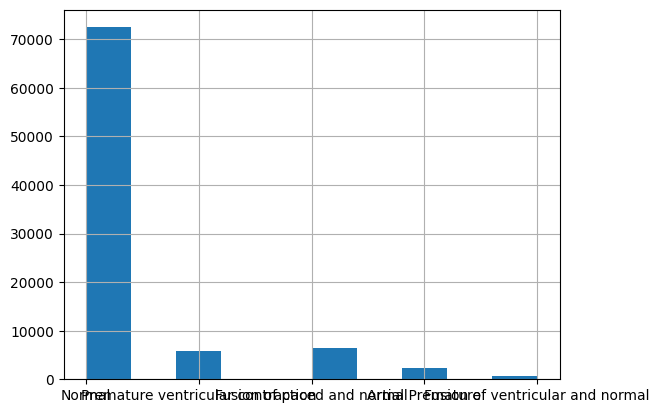

In [ ]:
df_train['label'].hist()

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87554 entries, 0 to 87553
Columns: 189 entries, 0 to label
dtypes: float64(188), object(1)
memory usage: 126.2+ MB


In [ ]:
df_train.describe()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,class
count,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,...,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000
mean,0.890360,0.758160,0.423972,0.219104,0.201127,0.210399,0.205808,0.201773,0.198691,0.196757,...,0.005025,0.004628,0.004291,0.003945,0.003681,0.003471,0.003221,0.002945,0.002807,0.473376
std,0.240909,0.221813,0.227305,0.206878,0.177058,0.171909,0.178481,0.177240,0.171778,0.168357,...,0.044154,0.042089,0.040525,0.038651,0.037193,0.036255,0.034789,0.032865,0.031924,1.143184
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.921922,0.682486,0.250969,0.048458,0.082329,0.088416,0.073333,0.066116,0.065000,0.068639,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.991342,0.826013,0.429472,0.166000,0.147878,0.158798,0.145324,0.144424,0.150000,0.148734,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.910506,0.578767,0.341727,0.258993,0.287628,0.298237,0.295391,0.290832,0.283636,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000


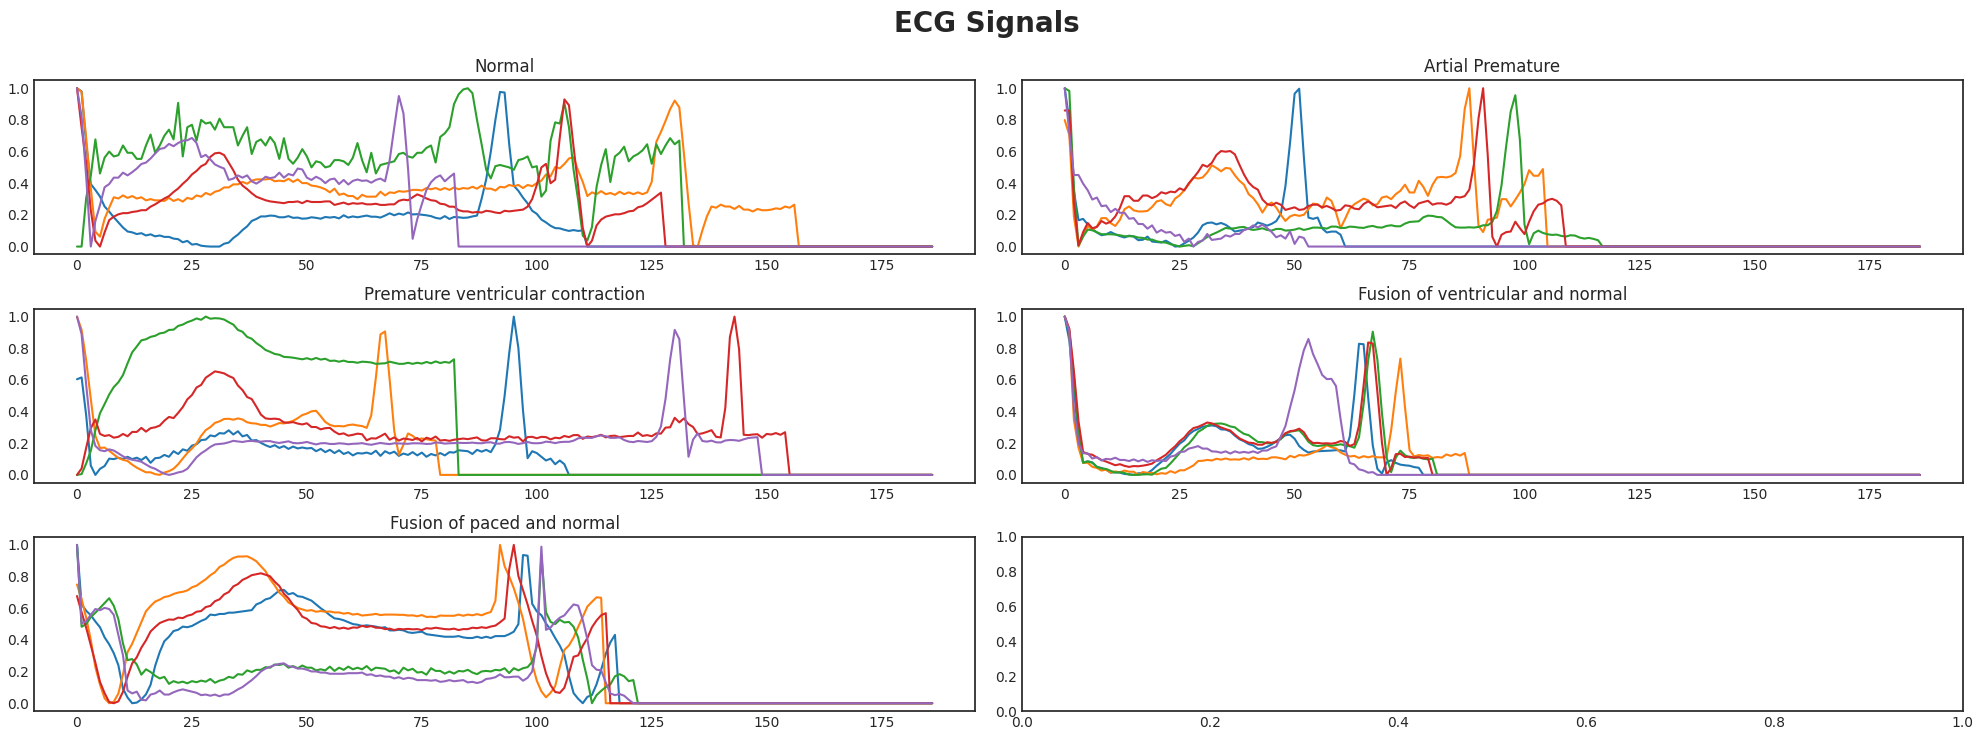

In [ ]:
N = 5
samples = [df_train.loc[df_train['class'] == cls].sample(N) for cls in range(N)]
titles = [id_to_label[cls] for cls in range(5)]

with plt.style.context("seaborn-white"):
    fig, axs = plt.subplots(3, 2, figsize=(20, 7))
    for i in range(5):
        ax = axs.flat[i]
        ax.plot(samples[i].values[:,:-2].transpose())
        ax.set_title(titles[i])
        #plt.ylabel("Amplitude")

    plt.tight_layout()
    plt.suptitle("ECG Signals", fontsize=20, y=1.05, weight="bold")
    plt.savefig(f"signals_per_class.svg",
                    format="svg",bbox_inches='tight', pad_inches=0.2)

    plt.savefig(f"signals_per_class.png",
                    format="png",bbox_inches='tight', pad_inches=0.2)

# 准备训练集和测试集

In [ ]:
train_num = 20000
test_num = 10000
x_train = df_train.iloc[:train_num,:187].values
y_train = df_train.iloc[:train_num,187].values

x_test = df_test.iloc[:test_num,:187].values
y_test = df_test.iloc[:test_num,187].values

x_train.shape,y_train.shape,x_test.shape,y_test.shape

((20000, 187), (20000,), (10000, 187), (10000,))

In [ ]:
x_train[:,-1][:20]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

In [ ]:
y_train[:20]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 2., 0., 2., 2., 0.,
       2., 0., 2.])

In [ ]:
type(y_train)

numpy.ndarray

In [ ]:
np.unique(y_train)

array([0., 1., 2., 3., 4.])

In [ ]:
y_train

array([0., 0., 0., ..., 0., 0., 0.])

# ----- 机器学习算法 -----

# 决策树

### 建模训练评估

In [ ]:
from sklearn import tree
# rf = RandomForestClassifier()
clf = tree.DecisionTreeClassifier()

clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
clf.score(x_test,y_test)

0.9404

In [ ]:
predict_label = clf.predict(x_test)
predict_label[:5]

array([0., 0., 0., 0., 0.])

### 分类报告

In [ ]:
print(classification_report(y_test, predict_label,digits=4))

              precision    recall  f1-score   support

         0.0     0.9678    0.9703    0.9690      8270
         1.0     0.6157    0.5731    0.5936       260
         2.0     0.8161    0.8063    0.8112       666
         3.0     0.4079    0.4247    0.4161        73
         4.0     0.9045    0.9070    0.9057       731

    accuracy                         0.9404     10000
   macro avg     0.7424    0.7363    0.7391     10000
weighted avg     0.9398    0.9404    0.9401     10000



### 混淆矩阵

In [ ]:

cnf_matrix = confusion_matrix(y_test, predict_label)
cnf_matrix

array([[8024,   82,   84,   34,   46],
       [  98,  149,    6,    1,    6],
       [  92,   10,  537,    9,   18],
       [  26,    0,   16,   31,    0],
       [  51,    1,   15,    1,  663]])

<Axes: >

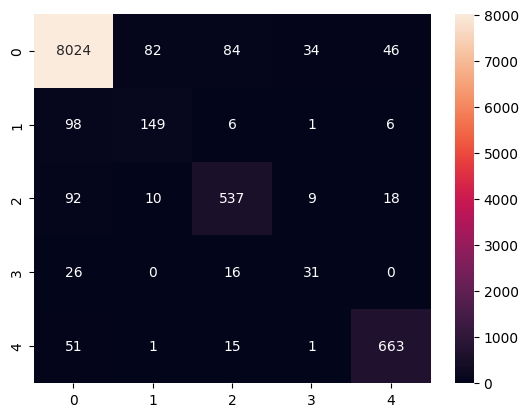

In [ ]:
sns.heatmap(cnf_matrix, annot=True, fmt='g')

<Axes: >

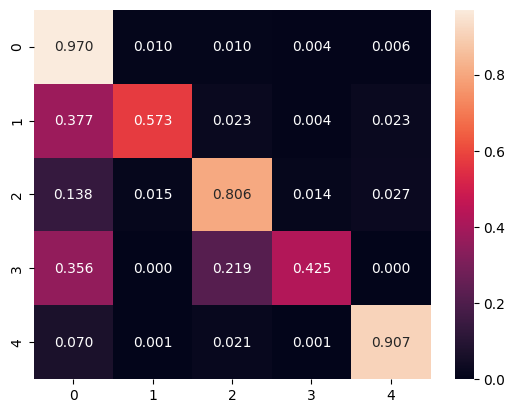

In [ ]:
cm_normalized = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm_normalized, annot=True, fmt='.3f')

# 随机森林

### 建模训练评估

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=5)

rf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=5)

In [ ]:
rf.score(x_test,y_test)

0.9636

In [ ]:
predict_label = rf.predict(x_test)
predict_label[:5]

array([0., 0., 0., 0., 0.])

### 分类报告

In [ ]:
print(classification_report(y_test, predict_label,digits=4))

              precision    recall  f1-score   support

         0.0     0.9644    0.9953    0.9796      8270
         1.0     0.9290    0.5538    0.6940       260
         2.0     0.9384    0.8468    0.8903       666
         3.0     0.8710    0.3699    0.5192        73
         4.0     0.9882    0.9166    0.9510       731

    accuracy                         0.9636     10000
   macro avg     0.9382    0.7365    0.8068     10000
weighted avg     0.9628    0.9636    0.9608     10000



### 混淆矩阵

In [ ]:

cnf_matrix = confusion_matrix(y_test, predict_label)
cnf_matrix

array([[8231,   10,   21,    3,    5],
       [ 116,  144,    0,    0,    0],
       [  97,    1,  564,    1,    3],
       [  36,    0,   10,   27,    0],
       [  55,    0,    6,    0,  670]])

<Axes: >

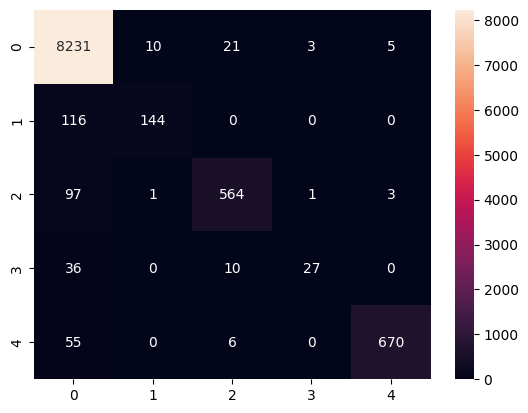

In [ ]:
sns.heatmap(cnf_matrix, annot=True, fmt='g')

<Axes: >

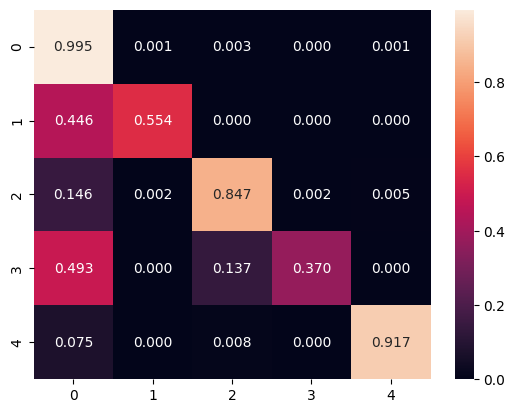

In [ ]:
cm_normalized = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm_normalized, annot=True, fmt='.3f')

# ----- 深度学习算法 -----

# 数据处理pipline

## 生成dataset

In [ ]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((20000, 187), (20000,), (10000, 187), (10000,))

In [ ]:
class CustomImageDataset(Dataset):
    def __init__(self, all_data_list,label_list):
        self.all_data_list = all_data_list
        self.label_list = label_list

    def __len__(self):
        return len(self.all_data_list)

    def __getitem__(self, idx):
        feature = self.all_data_list[idx].astype(np.float32)
        label = self.label_list[idx].astype(np.longlong)
        return feature, label
ds_train = CustomImageDataset(x_train,y_train)
ds_test = CustomImageDataset(x_test,y_test)
ds_train[1]

(array([0.95983934, 0.6706827 , 0.02008032, 0.06827309, 0.05220884,
        0.09437751, 0.13052209, 0.13453816, 0.13052209, 0.14658634,
        0.13855422, 0.14457831, 0.13654618, 0.15461847, 0.15461847,
        0.16666667, 0.15863454, 0.1626506 , 0.16867469, 0.17670682,
        0.1746988 , 0.18273093, 0.18473895, 0.20080322, 0.20080322,
        0.2128514 , 0.2188755 , 0.23895583, 0.24698795, 0.26907632,
        0.28514057, 0.32329318, 0.34136546, 0.37951806, 0.40763053,
        0.43975905, 0.47188756, 0.5       , 0.52208835, 0.53413653,
        0.51004016, 0.4698795 , 0.3995984 , 0.3313253 , 0.25903615,
        0.2128514 , 0.15662651, 0.14257029, 0.12048193, 0.11044177,
        0.09638554, 0.09437751, 0.09036145, 0.09036145, 0.07831325,
        0.08835341, 0.08032128, 0.09236947, 0.09036145, 0.09839357,
        0.09236947, 0.09638554, 0.08835341, 0.10040161, 0.09236947,
        0.1064257 , 0.09236947, 0.09638554, 0.09036145, 0.09036145,
        0.08433735, 0.09036145, 0.08433735, 0.08

In [ ]:
len(ds_train),len(ds_test)

(20000, 10000)

## 生成dataloader

In [ ]:
train_dl = DataLoader(ds_train, batch_size=20, shuffle=True,num_workers=2)
test_dl = DataLoader(ds_test, batch_size=20, shuffle=False,num_workers=2)

In [ ]:
# Display image and label.
b_x, b_y = next(iter(train_dl))
print(f"b_x batch shape: {b_x.size()}")
print(f"b_y batch shape: {b_y.size()}")


b_x batch shape: torch.Size([20, 187])
b_y batch shape: torch.Size([20])


# 确定CPU GPU设备

In [ ]:
# Get cpu or gpu device for training.
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cpu device


In [ ]:
num_classes = 5

# 准备训练和测试循环

In [ ]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 250 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for (x, y) in dataloader:
            x = x.to(device)

            y = y.to(device)

            pred = model(x)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")
    return test_loss, correct

# 模型 CNN

## 构建基础模型

In [ ]:
class BaseModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv1d(1, 6, 3)
        self.pool = nn.MaxPool1d(2, 2)
        self.conv2 = nn.Conv1d(6, 16, 3)
        self.conv3 = nn.Conv1d(16, 32, 3)
        self.conv4 = nn.Conv1d(32, 32, 3)
        self.fc1 = nn.Linear(288, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, num_classes)

    def forward(self, x):
        x = x.view(-1,1,187)
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = self.pool(F.relu(self.conv4(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


cnn_model = BaseModel().to(device)

cnn_model(b_x.to(device)).shape

torch.Size([20, 5])

## 分配损失函数和优化器

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(cnn_model.parameters(), lr=1e-3)

In [ ]:
# Adam(params, lr=0.001

## 训练和评估

In [ ]:
epochs = 3
train_loss_list = []
train_acc_list = []
test_loss_list = []
test_acc_list = []
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dl, cnn_model, loss_fn, optimizer)

    train_loss, train_correct = test(train_dl, cnn_model, loss_fn)
    test_loss, test_correct = test(test_dl, cnn_model, loss_fn)
    train_loss_list.append(train_loss)
    train_acc_list.append(train_correct)
    test_loss_list.append(test_loss)
    test_acc_list.append(test_correct)
print("Done!")

Epoch 1
-------------------------------
loss: 1.598377  [   20/20000]
loss: 1.153937  [ 5020/20000]
loss: 0.534867  [10020/20000]
loss: 0.386368  [15020/20000]
Test Error: 
 Accuracy: 88.2%, Avg loss: 0.400469 

Test Error: 
 Accuracy: 88.5%, Avg loss: 0.403622 

Epoch 2
-------------------------------
loss: 0.238283  [   20/20000]
loss: 0.229189  [ 5020/20000]
loss: 0.411698  [10020/20000]
loss: 0.076837  [15020/20000]
Test Error: 
 Accuracy: 93.0%, Avg loss: 0.254254 

Test Error: 
 Accuracy: 93.2%, Avg loss: 0.252643 

Epoch 3
-------------------------------
loss: 0.018533  [   20/20000]
loss: 0.124639  [ 5020/20000]
loss: 0.320392  [10020/20000]
loss: 0.039384  [15020/20000]
Test Error: 
 Accuracy: 94.0%, Avg loss: 0.206916 

Test Error: 
 Accuracy: 94.2%, Avg loss: 0.212924 

Done!


## 可视化训练过程

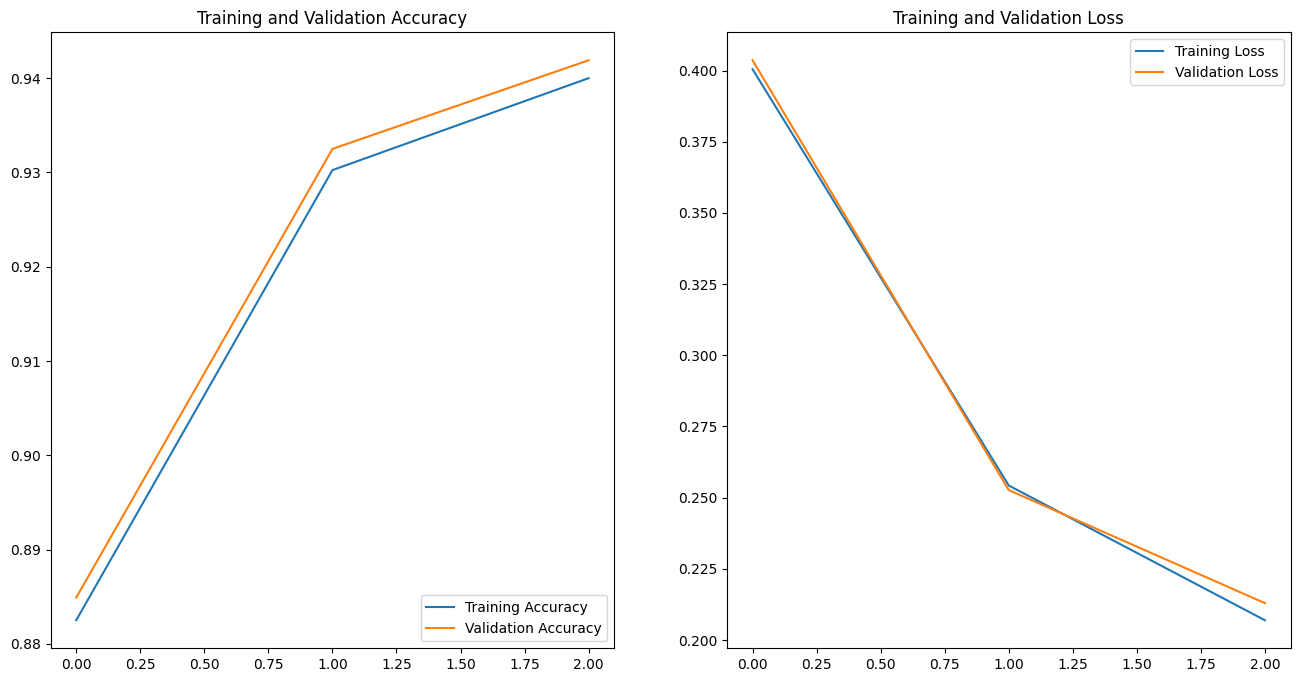

In [ ]:
# train_loss_array,train_acc_array,val_loss_array,val_acc_array
acc = train_acc_list
val_acc = test_acc_list

loss = train_loss_list
val_loss = test_loss_list
epochs_range = range(epochs)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### 模型验证集预测

In [ ]:
predict_list = []
label_list = []
predict_pro_list = []
m_softmax = nn.Softmax(dim=1)
# for image_batch, labels_batch in dataloaders['val']:
for (X, y) in test_dl:
    X = X.to(device)
    y = y.to(device)

    predict_score = cnn_model(X)
    predict_pro = m_softmax(predict_score)

    predict_label = np.argmax(predict_score.detach().cpu().numpy(),axis=1)

    predict_pro_list.append(predict_pro.detach().cpu().numpy())
    predict_list.append(predict_label)
    label_list.append(y.detach().cpu().numpy())

predict_pro_array = np.vstack(predict_pro_list)[:,1]
predict_array = np.hstack(predict_list)
label_array = np.hstack(label_list)
predict_pro_array[:5],predict_array[:5],label_array[:5]

(array([0.00065534, 0.0233215 , 0.00028361, 0.01498824, 0.00623518],
       dtype=float32),
 array([0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0]))

### 分类报告

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(label_array, predict_array,digits=3))

              precision    recall  f1-score   support

           0      0.946     0.991     0.968      8270
           1      0.892     0.381     0.534       260
           2      0.862     0.713     0.781       666
           3      1.000     0.014     0.027        73
           4      0.966     0.889     0.926       731

    accuracy                          0.942     10000
   macro avg      0.933     0.598     0.647     10000
weighted avg      0.941     0.942     0.934     10000



### 混淆矩阵

In [ ]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(label_array, predict_array)
cnf_matrix

array([[8194,   10,   48,    0,   18],
       [ 157,   99,    4,    0,    0],
       [ 184,    2,  475,    0,    5],
       [  59,    0,   13,    1,    0],
       [  70,    0,   11,    0,  650]])

<Axes: >

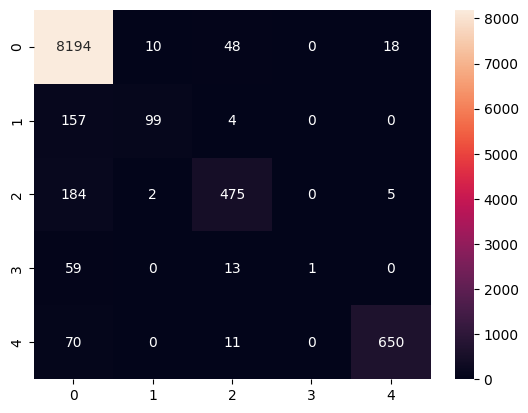

In [ ]:
sns.heatmap(cnf_matrix, annot=True, fmt='g')

<Axes: >

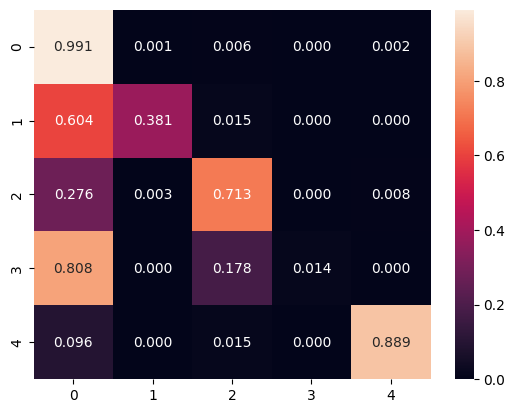

In [ ]:
cm_normalized = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm_normalized, annot=True, fmt='.3f')

# 模型 LSTM

## 构建基础模型

In [ ]:
class LSTMModel(nn.Module):
    def __init__(self,):
        super().__init__()
        self.lstm = nn.LSTM(187,8)
        self.out = nn.Linear(8, num_classes)
        self.flatten = nn.Flatten()

    def forward(self, x):

        x,_ = self.lstm(x)
        x = self.flatten(x)
        x = self.out(x)

        return x
lstm_model = LSTMModel().to(device)

lstm_model(b_x.to(device)).shape

torch.Size([20, 5])

## 分配损失函数和优化器

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(lstm_model.parameters(), lr=1e-3)

In [ ]:
# Adam(params, lr=0.001

## 训练和评估

In [ ]:
epochs = 3
train_loss_list = []
train_acc_list = []
test_loss_list = []
test_acc_list = []
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dl, lstm_model, loss_fn, optimizer)

    train_loss, train_correct = test(train_dl, lstm_model, loss_fn)
    test_loss, test_correct = test(test_dl, lstm_model, loss_fn)
    train_loss_list.append(train_loss)
    train_acc_list.append(train_correct)
    test_loss_list.append(test_loss)
    test_acc_list.append(test_correct)
print("Done!")

Epoch 1
-------------------------------
loss: 1.806616  [   20/20000]
loss: 0.583311  [ 5020/20000]
loss: 0.770072  [10020/20000]
loss: 0.652208  [15020/20000]
Test Error: 
 Accuracy: 82.7%, Avg loss: 0.542709 

Test Error: 
 Accuracy: 82.7%, Avg loss: 0.543323 

Epoch 2
-------------------------------
loss: 0.462280  [   20/20000]
loss: 0.630758  [ 5020/20000]
loss: 0.460451  [10020/20000]
loss: 0.404093  [15020/20000]
Test Error: 
 Accuracy: 87.9%, Avg loss: 0.445440 

Test Error: 
 Accuracy: 87.7%, Avg loss: 0.445683 

Epoch 3
-------------------------------
loss: 0.473277  [   20/20000]
loss: 0.330842  [ 5020/20000]
loss: 0.560890  [10020/20000]
loss: 0.301490  [15020/20000]
Test Error: 
 Accuracy: 88.6%, Avg loss: 0.406770 

Test Error: 
 Accuracy: 88.5%, Avg loss: 0.406930 

Done!


## 可视化训练过程

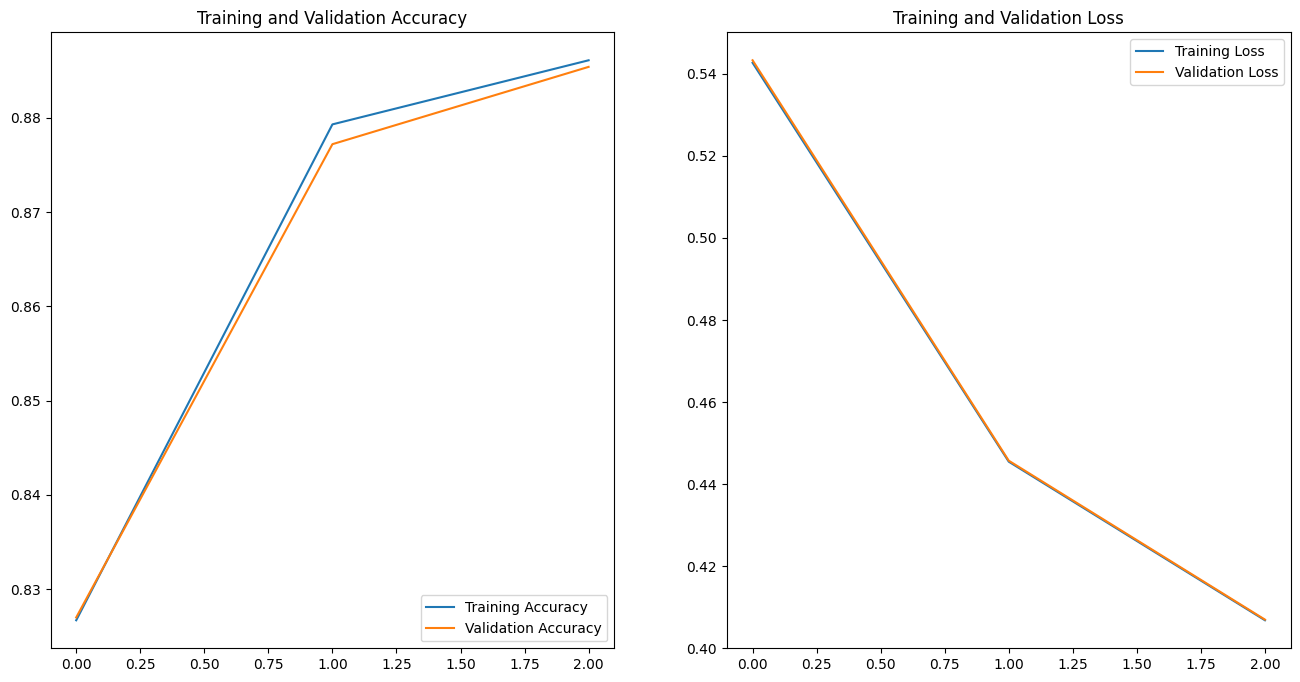

In [ ]:
# train_loss_array,train_acc_array,val_loss_array,val_acc_array
acc = train_acc_list
val_acc = test_acc_list

loss = train_loss_list
val_loss = test_loss_list
epochs_range = range(epochs)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### 模型验证集预测

In [ ]:
predict_list = []
label_list = []
predict_pro_list = []
m_softmax = nn.Softmax(dim=1)
# for image_batch, labels_batch in dataloaders['val']:
for (X, y) in test_dl:
    X = X.to(device)
    y = y.to(device)

    predict_score = lstm_model(X)
    predict_pro = m_softmax(predict_score)

    predict_label = np.argmax(predict_score.detach().cpu().numpy(),axis=1)

    predict_pro_list.append(predict_pro.detach().cpu().numpy())
    predict_list.append(predict_label)
    label_list.append(y.detach().cpu().numpy())

predict_pro_array = np.vstack(predict_pro_list)[:,1]
predict_array = np.hstack(predict_list)
label_array = np.hstack(label_list)
predict_pro_array[:5],predict_array[:5],label_array[:5]

(array([0.05940074, 0.02121766, 0.03330202, 0.02037614, 0.01988379],
       dtype=float32),
 array([0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0]))

### 分类报告

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(label_array, predict_array,digits=3))

              precision    recall  f1-score   support

           0      0.892     0.993     0.940      8270
           1      0.000     0.000     0.000       260
           2      0.571     0.018     0.035       666
           3      0.000     0.000     0.000        73
           4      0.810     0.865     0.837       731

    accuracy                          0.885     10000
   macro avg      0.455     0.375     0.362     10000
weighted avg      0.835     0.885     0.841     10000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 混淆矩阵

In [ ]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(label_array, predict_array)
cnf_matrix

array([[8210,    0,    8,    0,   52],
       [ 259,    0,    1,    0,    0],
       [ 560,    0,   12,    0,   94],
       [  71,    0,    0,    0,    2],
       [  99,    0,    0,    0,  632]])

<Axes: >

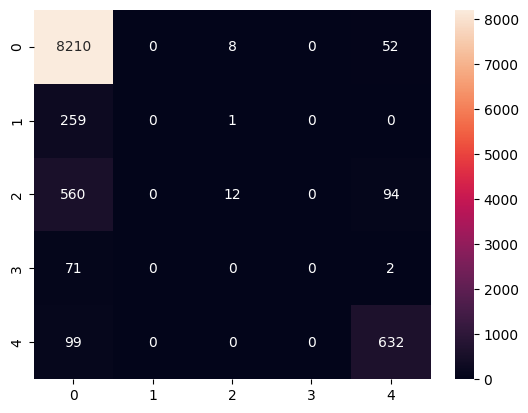

In [ ]:
sns.heatmap(cnf_matrix, annot=True, fmt='g')

<Axes: >

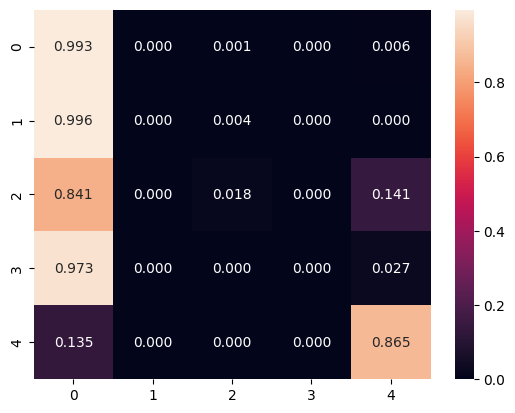

In [ ]:
cm_normalized = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm_normalized, annot=True, fmt='.3f')

# 模型 Transformer

## 构建基础模型

In [ ]:
class TfModel(nn.Module):
    def __init__(self,):
        super().__init__()

        encoder_layer = nn.TransformerEncoderLayer(d_model=187 , nhead=1)
        self.transformer_encoder = nn.TransformerEncoder(encoder_layer, num_layers=3)
        self.out = nn.Linear(187, num_classes)
        self.flatten = nn.Flatten()

    def forward(self, x):
        # x = self.nor(x)
        x= self.transformer_encoder(x)
        x = self.flatten(x)
        x = self.out(x)

        return x
tf_model = TfModel().to(device)
# text_cnn(text)[0].shape,text_cnn(text)[1].shape,text_cnn(text)[2].shape

tf_model(b_x.to(device)).shape

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/transformer.py:306: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


torch.Size([20, 5])

## 分配损失函数和优化器

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(tf_model.parameters(), lr=2e-5)

In [ ]:
# Adam(params, lr=0.001

## 训练和评估

In [ ]:
epochs = 3
train_loss_list = []
train_acc_list = []
test_loss_list = []
test_acc_list = []
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dl, tf_model, loss_fn, optimizer)

    train_loss, train_correct = test(train_dl, tf_model, loss_fn)
    test_loss, test_correct = test(test_dl, tf_model, loss_fn)
    train_loss_list.append(train_loss)
    train_acc_list.append(train_correct)
    test_loss_list.append(test_loss)
    test_acc_list.append(test_correct)
print("Done!")

Epoch 1
-------------------------------
loss: 1.807050  [   20/20000]
loss: 0.627093  [ 5020/20000]
loss: 0.108977  [10020/20000]
loss: 0.148722  [15020/20000]
Test Error: 
 Accuracy: 94.1%, Avg loss: 0.227096 

Test Error: 
 Accuracy: 94.0%, Avg loss: 0.232810 

Epoch 2
-------------------------------
loss: 0.096070  [   20/20000]
loss: 0.308868  [ 5020/20000]
loss: 0.137660  [10020/20000]
loss: 0.220228  [15020/20000]
Test Error: 
 Accuracy: 95.4%, Avg loss: 0.164598 

Test Error: 
 Accuracy: 95.0%, Avg loss: 0.180360 

Epoch 3
-------------------------------
loss: 0.358676  [   20/20000]
loss: 0.023243  [ 5020/20000]
loss: 0.091671  [10020/20000]
loss: 0.260364  [15020/20000]
Test Error: 
 Accuracy: 96.2%, Avg loss: 0.135347 

Test Error: 
 Accuracy: 96.0%, Avg loss: 0.155770 

Done!


## 可视化训练过程

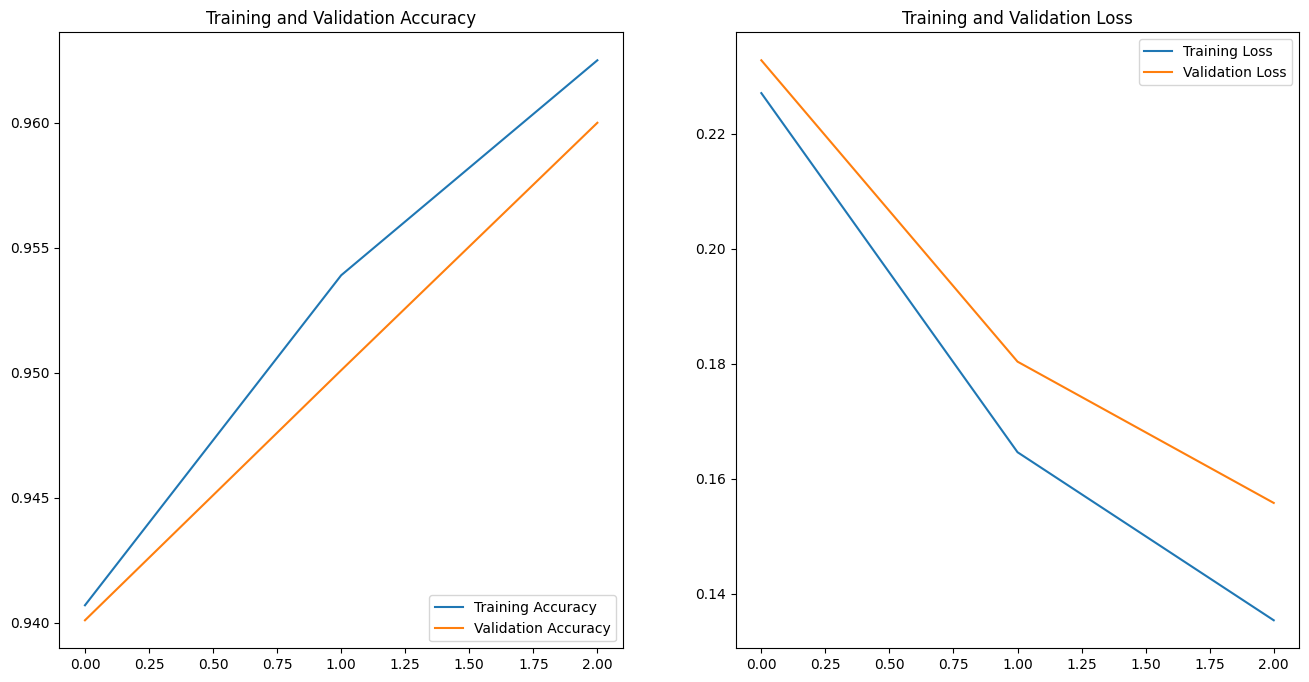

In [ ]:
# train_loss_array,train_acc_array,val_loss_array,val_acc_array
acc = train_acc_list
val_acc = test_acc_list

loss = train_loss_list
val_loss = test_loss_list
epochs_range = range(epochs)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### 模型验证集预测

In [ ]:
predict_list = []
label_list = []
predict_pro_list = []
m_softmax = nn.Softmax(dim=1)
# for image_batch, labels_batch in dataloaders['val']:
for (X, y) in test_dl:
    X = X.to(device)
    y = y.to(device)

    predict_score = tf_model(X)
    predict_pro = m_softmax(predict_score)

    predict_label = np.argmax(predict_score.detach().cpu().numpy(),axis=1)

    predict_pro_list.append(predict_pro.detach().cpu().numpy())
    predict_list.append(predict_label)
    label_list.append(y.detach().cpu().numpy())

predict_pro_array = np.vstack(predict_pro_list)[:,1]
predict_array = np.hstack(predict_list)
label_array = np.hstack(label_list)
predict_pro_array[:5],predict_array[:5],label_array[:5]

(array([0.00482571, 0.0207553 , 0.00782038, 0.01891226, 0.00440978],
       dtype=float32),
 array([0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0]))

### 分类报告

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(label_array, predict_array,digits=3))

              precision    recall  f1-score   support

           0      0.969     0.989     0.979      8270
           1      0.911     0.512     0.655       260
           2      0.868     0.890     0.879       666
           3      0.744     0.397     0.518        73
           4      0.968     0.908     0.937       731

    accuracy                          0.960     10000
   macro avg      0.892     0.739     0.794     10000
weighted avg      0.959     0.960     0.957     10000



### 混淆矩阵

In [ ]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(label_array, predict_array)
cnf_matrix

array([[8181,   13,   55,    3,   18],
       [ 115,  133,   11,    0,    1],
       [  63,    0,  593,    7,    3],
       [  32,    0,   12,   29,    0],
       [  55,    0,   12,    0,  664]])

<Axes: >

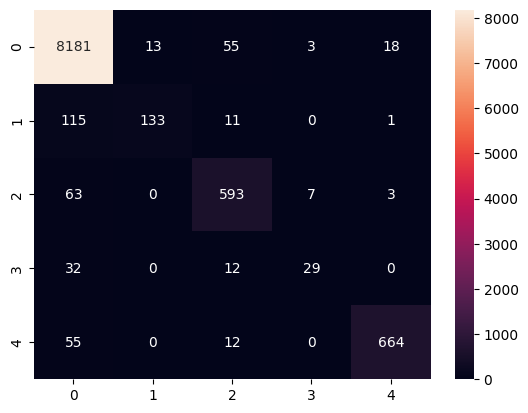

In [ ]:
sns.heatmap(cnf_matrix, annot=True, fmt='g')

<Axes: >

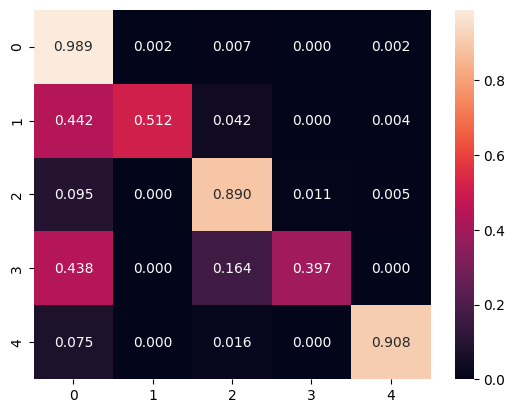

In [ ]:
cm_normalized = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm_normalized, annot=True, fmt='.3f')